In [1]:
import torch as t
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
from torch.autograd import Variable
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams["figure.figsize"]=[9,6]

In [2]:
X = np.loadtxt('features1.txt')
# Y = np.loadtxt('one_hot_labels.txt')
X_test = np.loadtxt('test_features.txt')
Y = np.loadtxt('labels1.txt')
X.dtype, Y.dtype

(dtype('float64'), dtype('float64'))

In [3]:
X

array([[ -19.53492928,  136.31362915,  815.72644043],
       [ -19.31205559,  153.7588501 , 1183.45141602],
       [ -19.58080864,  135.11691284,  837.51904297],
       ...,
       [ -19.45382881,  132.81143188,  982.19726562],
       [ -19.8517189 ,  115.95764923,   -8.54038239],
       [ -19.9745388 ,  128.5796051 ,  144.18066406]])

In [4]:
X_test

array([[ -19.89336777,  106.49491119, -135.65530396],
       [ -19.26239204,  179.0717926 , 1002.57763672],
       [ -19.33394814,  141.20626831,  550.26672363],
       ...,
       [ -19.80302811,  136.95666504,  434.77105713],
       [ -19.67573738,  144.38537598,  437.77224731],
       [ -19.60916901,  111.43590546,  166.87530518]])

In [5]:
Y.shape

(20000,)

In [6]:
X.shape, X_test.shape

((20000, 3), (8000, 3))

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_scaled

array([[0.4934267 , 0.53741655, 0.67121584],
       [0.65811133, 0.69341426, 0.92067876],
       [0.45952577, 0.52671534, 0.68599984],
       ...,
       [0.55335303, 0.50609939, 0.78414888],
       [0.25934622, 0.3553904 , 0.11203707],
       [0.16859281, 0.46825778, 0.21564231]])

In [10]:
X_test_scaled

array([[0.22857127, 0.27077322, 0.02580289],
       [0.69480845, 0.91976629, 0.79797483],
       [0.64193461, 0.58116724, 0.49112921],
       ...,
       [0.29532456, 0.54316667, 0.41277748],
       [0.38938154, 0.60959529, 0.41481348],
       [0.43856988, 0.31495631, 0.23103825]])

In [11]:
X_ = normalize(X, axis=0, norm='max')
X_test_ = normalize(X_test, axis=0, norm='max')
X_, X_test_

(array([[ 1.03637067,  0.72490158,  0.62730034],
        [ 1.02454673,  0.81767343,  0.91008386],
        [ 1.03880467,  0.71853757,  0.64405903],
        ...,
        [ 1.03206811,  0.70627726,  0.75531777],
        [ 1.05317705,  0.61665061, -0.00656762],
        [ 1.05969292,  0.68377285,  0.11087612]]),
 array([[ 1.05498266,  0.57044973, -0.10429626],
        [ 1.02152083,  0.95921443,  0.77081468],
        [ 1.02531559,  0.75638429,  0.42306317],
        ...,
        [ 1.05019178,  0.7336209 ,  0.3342663 ],
        [ 1.04344131,  0.77341347,  0.33657371],
        [ 1.03991107,  0.59691662,  0.12829923]]))

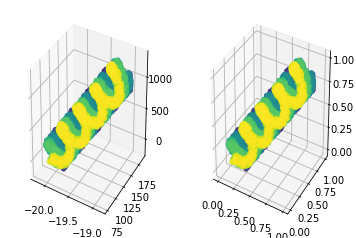

In [12]:
cm = plt.get_cmap('viridis')
col = [cm(float(i)/(len(X))) for i in range(len(X))]
fig = plt.figure()
ax3D = fig.add_subplot(121, projection='3d')
ax3D.scatter(X.T[0], X.T[1], X.T[2], s=10, c=col, marker='o')  
ax3D = fig.add_subplot(122, projection='3d')
ax3D.scatter(X_scaled.T[0], X_scaled.T[1], X_scaled.T[2], s=10, c=col, marker='o')  
plt.show()

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.25, random_state=7)

In [14]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((15000, 3), (5000, 3), (15000,), (5000,))

In [15]:
t_X_train = t.from_numpy(X_train.astype('float32')).view(-1,3)
t_Y_train = t.from_numpy(Y_train.astype('long'))

t_X_val = t.from_numpy(X_val.astype('float32')).view(-1,3)
t_Y_val = t.from_numpy(Y_val.astype('long'))

t_X_test = t.from_numpy(X_test_scaled.astype('float32')).view(-1,3)

In [16]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((15000, 3), (5000, 3), (15000,), (5000,))

In [17]:
t_X_train.shape, t_X_val.shape, t_X_test.shape, t_Y_train.shape, t_Y_val.shape

(torch.Size([15000, 3]),
 torch.Size([5000, 3]),
 torch.Size([8000, 3]),
 torch.Size([15000]),
 torch.Size([5000]))

In [18]:
batch_size = 1024

In [19]:
train_set = t.utils.data.TensorDataset(t_X_train, t_Y_train)
val_set = t.utils.data.TensorDataset(t_X_val, t_Y_val)

train_data_loader = t.utils.data.DataLoader(train_set, batch_size=batch_size)
val_data_loader = t.utils.data.DataLoader(val_set, batch_size=batch_size)

In [20]:
loss_fun = t.nn.CrossEntropyLoss()

In [21]:
def accuracy(model, inp, target):
    pred = t.softmax(model(inp),dim=1)
    pred_class = t.argmax(pred,dim=1)
    return t.sum(pred_class == target).item()/len(target) 

In [22]:
epochs = 100
lr = 2e-3

In [23]:
def create_model(neurons):
    entries, exits = 3, 4
    model = t.nn.Sequential(
        t.nn.Linear(entries, neurons), t.nn.ReLU(),
        t.nn.Linear(neurons, neurons*2), t.nn.ReLU(),
        t.nn.Linear(neurons*2, neurons*2), t.nn.ReLU(),
        t.nn.Linear(neurons*2, neurons*2), t.nn.ReLU(),
        t.nn.Linear(neurons*2, neurons*2), t.nn.ReLU(),
        t.nn.Linear(neurons*2, neurons*2), t.nn.ReLU(),
        t.nn.Linear(neurons*2, neurons*2), t.nn.ReLU(),
        t.nn.Linear(neurons*2, neurons), t.nn.ReLU(),
        t.nn.Linear(neurons, neurons), t.nn.ReLU(),
        t.nn.Linear(neurons, neurons), t.nn.ReLU(),
        t.nn.Linear(neurons, exits)
    )
                        
    return model

In [24]:
model = create_model(neurons=256)

In [25]:
optimizer = t.optim.Adam(model.parameters(), lr=lr, weight_decay=lr*0.01)

In [26]:
for p in model.parameters():
    t.nn.init.uniform_(p, -0.2, 0.2)

In [27]:
%%time
err_train=[]
err_valid=[]
acc_train=[]
acc_valid=[]
for epoch in range(epochs):
    for data_ in train_data_loader:
        optimizer.zero_grad()
        outputs, target = data_
        pred = model(outputs)
        loss = loss_fun(pred, target)
        loss.backward()
        optimizer.step()
    
    with t.no_grad():
        vpred  = model(val_set[:][0])
        vloss  = loss_fun(vpred,val_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_fun(pred,train_set[:][1])
        err_train.append(loss)
        acc = accuracy(model, train_set[:][0], train_set[:][1])
        acc_train.append(acc)
        vacc = accuracy(model, val_set[:][0], val_set[:][1])
        acc_valid.append(vacc)

        print("epoch %d %f %f %f %f" % (epoch+1, loss, vloss, acc, vacc)) 

epoch 1 2.398737 2.434034 0.257000 0.254600
epoch 2 1.508469 1.515053 0.264600 0.243400
epoch 3 1.410114 1.398757 0.245267 0.264200
epoch 4 1.382551 1.382514 0.292733 0.288800
epoch 5 1.374918 1.373767 0.296600 0.300800
epoch 6 1.367030 1.362680 0.283200 0.305600
epoch 7 1.337716 1.335379 0.307533 0.325800
epoch 8 1.305047 1.304703 0.342600 0.354400
epoch 9 1.252573 1.259525 0.384133 0.386600
epoch 10 1.184675 1.200926 0.407733 0.394800
epoch 11 1.136625 1.153040 0.467667 0.450600
epoch 12 1.126700 1.146184 0.454667 0.432400
epoch 13 1.063040 1.081427 0.490667 0.466200
epoch 14 1.037693 1.047292 0.509867 0.509600
epoch 15 0.966412 0.972671 0.545000 0.541600
epoch 16 0.884845 0.891583 0.615200 0.605600
epoch 17 0.860402 0.867557 0.608267 0.600600
epoch 18 0.825160 0.830425 0.616400 0.613200
epoch 19 0.759976 0.753014 0.678067 0.690000
epoch 20 0.677756 0.677917 0.713133 0.706400
epoch 21 0.640440 0.642668 0.720000 0.720400
epoch 22 0.622930 0.631626 0.725800 0.724200
epoch 23 0.625886 0

In [28]:
print('Train:\t', accuracy(model, train_set[:][0], train_set[:][1]))
print('Test:\t', accuracy(model, val_set[:][0], val_set[:][1]))

Train:	 0.8477333333333333
Test:	 0.837


In [29]:
unique, counts = np.unique(train_set[:][1], return_counts=True)
dict(zip(unique, counts))

{0: 3821, 1: 3754, 2: 3679, 3: 3746}

In [30]:
unique, counts = np.unique(val_set[:][1], return_counts=True)
dict(zip(unique, counts))

{0: 1179, 1: 1246, 2: 1321, 3: 1254}

In [31]:
t_X_test[:].shape

torch.Size([8000, 3])

In [32]:
prediction = model(t_X_test)

In [33]:
prediction[:10]

tensor([[13.0129,  0.5258, -8.5684,  3.6110],
        [-1.0638, -4.4958,  2.0559,  5.7576],
        [-0.0768, -3.8673,  3.0885,  6.3119],
        [-4.7849,  3.9856,  5.3084, -4.8264],
        [-3.4401,  4.4898,  3.6924, -6.1561],
        [ 6.1630,  6.5532, -2.3534, -3.5796],
        [ 4.9102,  7.1889, -2.0128, -5.7533],
        [ 7.7834,  0.5850, -3.8528,  3.3824],
        [-6.8919, -2.1145,  7.8563,  1.3495],
        [ 4.8928,  4.5140, -3.3719, -2.5708]], grad_fn=<SliceBackward>)

In [34]:
_, predicted = t.max(prediction, 1)

In [35]:
np_predicted = predicted.numpy()
np_predicted[:50]

array([0, 3, 3, 2, 1, 1, 1, 0, 2, 0, 3, 2, 2, 3, 3, 1, 0, 1, 0, 2, 1, 2,
       1, 3, 2, 3, 1, 3, 0, 0, 0, 3, 0, 3, 1, 1, 1, 0, 2, 0, 3, 0, 1, 1,
       2, 2, 2, 3, 0, 0])

In [36]:
unique, counts = np.unique(np_predicted, return_counts=True)
dict(zip(unique, counts))

{0: 1911, 1: 1869, 2: 2253, 3: 1967}

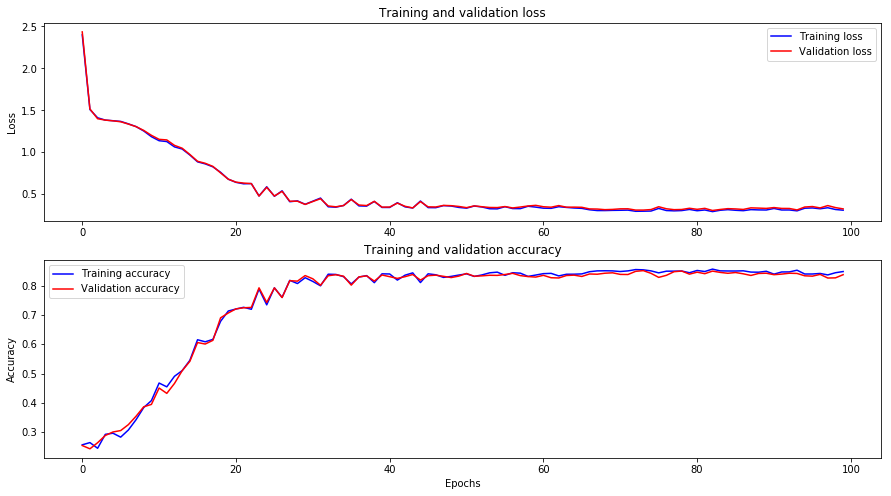

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(err_train, 'b', label='Training loss')
plt.plot(err_valid, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(212)
plt.plot(acc_train, 'b', label='Training accuracy')
plt.plot(acc_valid, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [38]:
model

Sequential(
  (0): Linear(in_features=3, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=512, bias=True)
  (13): ReLU()
  (14): Linear(in_features=512, out_features=256, bias=True)
  (15): ReLU()
  (16): Linear(in_features=256, out_features=256, bias=True)
  (17): ReLU()
  (18): Linear(in_features=256, out_features=256, bias=True)
  (19): ReLU()
  (20): Linear(in_features=256, out_features=4, bias=True)
)

In [56]:
np.savetxt('prediction_torch.txt', np_predicted.astype(int))